In [31]:
%pip install fsspec huggingface_hub

import pandas as pd

splits = {'train': 'train.tsv', 'validation': 'validation.tsv', 'test': 'test.tsv'}
df = pd.read_csv("hf://datasets/ErfanMoosaviMonazzah/fake-news-detection-dataset-English/" + splits["train"], sep="\t")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


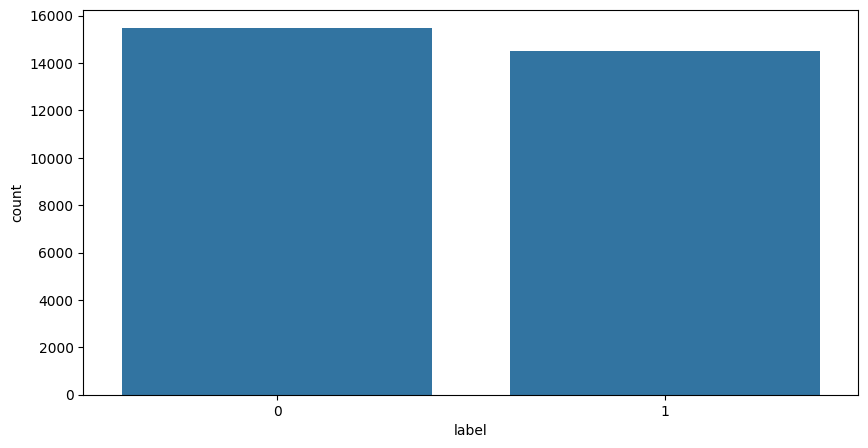

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# perform some eda
df['label'].value_counts()
# plot
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.show()

In [34]:
# check for missing values
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64

In [35]:
# check for duplicates
df.duplicated().sum()

0

In [36]:
# I want to check the distribution of the text length
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].describe()

count    30000.000000
mean       408.548733
std        353.639053
min          1.000000
25%        209.000000
50%        363.000000
75%        514.000000
max       8135.000000
Name: text_length, dtype: float64

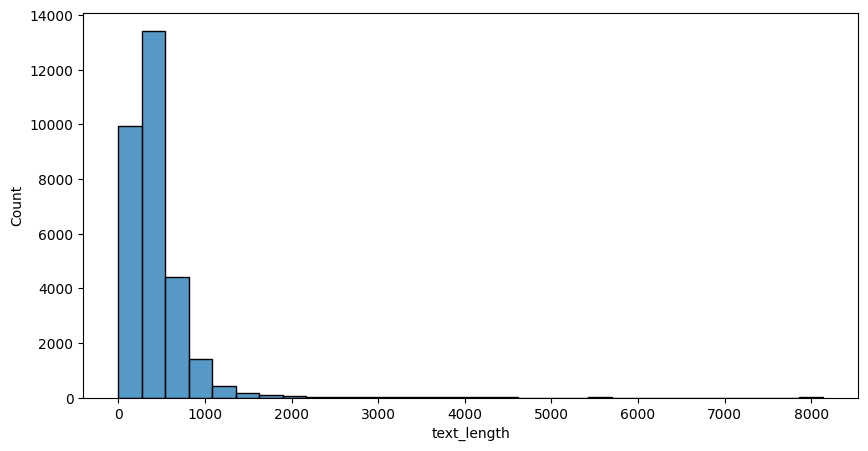

In [37]:
# plot
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=30)
plt.show()

In [38]:
# token length

# sum the length of all tokens in each text and divide by the total number of tokens
df['avg_token_length'] = df['text'].apply(lambda x: sum([len(token) for token in x.split()]) / len(x.split()))
df['avg_token_length'].describe()

count    30000.000000
mean         5.159253
std          2.083980
min          2.800000
25%          4.861218
50%          5.072072
75%          5.270400
max        145.000000
Name: avg_token_length, dtype: float64

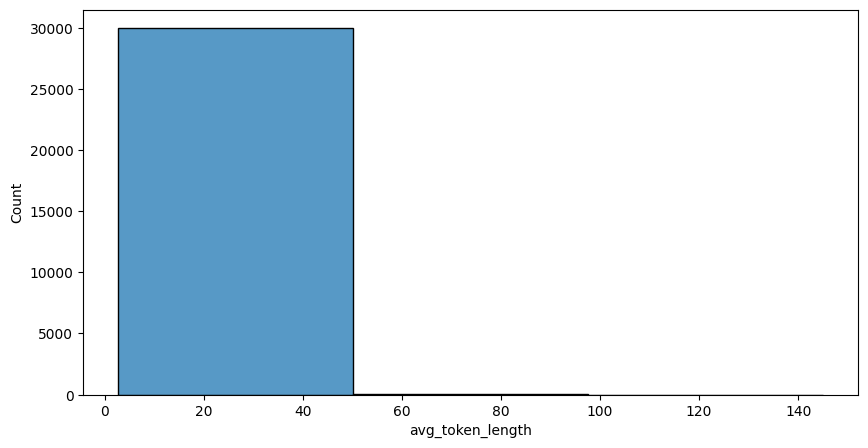

In [ ]:
# plot
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_token_length'], bins=3)
plt.show()

# este feature no creo que sirva pa nada pero lo meto por si acaso

In [ ]:
df.describe()

,Unnamed: 0,label,text_length,avg_token_length
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,11207.925800,0.484067,408.548733,5.159253
std,6533.101217,0.499754,353.639053,2.083980
min,0.000000,0.000000,1.000000,2.800000
25%,5560.750000,0.000000,209.000000,4.861218
50%,11071.500000,0.000000,363.000000,5.072072
75%,16832.500000,1.000000,514.000000,5.270400
max,23479.000000,1.000000,8135.000000,145.000000
